# problem statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [115]:
#import the models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [116]:
#importing the train data set
df_train=pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [117]:
#import the test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [118]:
#merge the train and test data
df = pd.concat([df_train, df_test], ignore_index=True)
df.head(-2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783660,1006035,P00135742,F,26-35,1,C,3,0,6,8.0,NaN,NaN
783661,1006036,P00255442,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN


In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [120]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [121]:
#delete the columns which are not helpful for the prediction
df.drop(['User_ID'],axis=1,inplace=True)



In [122]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handling the categorical values

In [123]:
pd.get_dummies(df["Gender"])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [124]:
#convert the gender values in numerics
df["Gender"]=df["Gender"].map({"F":0,"M":1})

In [125]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


age mapping

In [126]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [127]:
age_mapping = {
    '0-17': 1,
    '18-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-50': 5,
    '51-55': 6,
    '55+': 7
}

df["Age"] = df["Age"].map(age_mapping)

In [128]:
# #another method but include 0 also
# from sklearn.preprocessing import LabelEncoder


# # Initialize and fit LabelEncoder
# le = LabelEncoder()
# df['Age'] = le.fit_transform(df['Age'])
# df["Age"].unique()

In [129]:
df.head(11)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,5,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.0


fixing the categoical city_category

In [130]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [131]:
df_city=pd.get_dummies(df["City_Category"],drop_first=True)

In [132]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [133]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [134]:
df.drop("City_Category",axis=1,inplace=True)

In [135]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


# handling the missing values

In [136]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [137]:
#focus on replacing the missing values
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [138]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [139]:
#replace the missinf values with mode
p2_mode=df["Product_Category_2"].mode()[0]

In [140]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(p2_mode)

In [141]:
df["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [142]:
df["Product_Category_2"].isnull().sum()


np.int64(0)

product category 3 replace the missing the value


In [143]:
df["Product_Category_3"].isnull().sum()

np.int64(545809)

In [144]:
p3_mode=df["Product_Category_3"].mode()[0]
p3_mode

np.float64(16.0)

In [145]:
df["Product_Category_3"]=df["Product_Category_3"].fillna(p3_mode)
df["Product_Category_3"].isnull().sum()

np.int64(0)

In [146]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [147]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [148]:
df["Stay_In_Current_City_Years"].str.replace("+",'')

0         2
1         2
2         2
3         2
4         4
         ..
783662    4
783663    4
783664    4
783665    4
783666    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 61.3+ MB


convert object into integers

In [150]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace('4+', '4').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 61.3+ MB


In [151]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


In [153]:
df.head(11)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,P00193542,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,P00184942,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,P00346142,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,P0097242,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,P00274942,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


# visulation

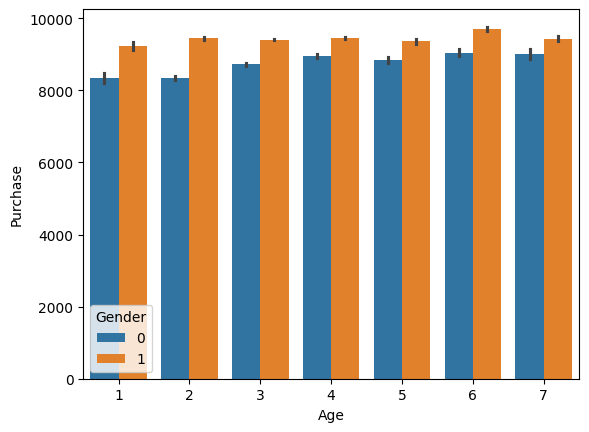

In [154]:
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)
plt.show()


observation : male is more purchase and the age is almost similar to every age

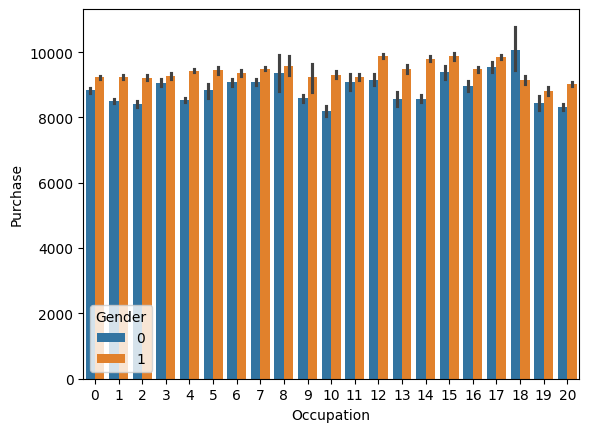

In [155]:
#visuzalation of urcase wit occupation
sns.barplot(x="Occupation", y="Purchase", hue="Gender", data=df)
plt.show()


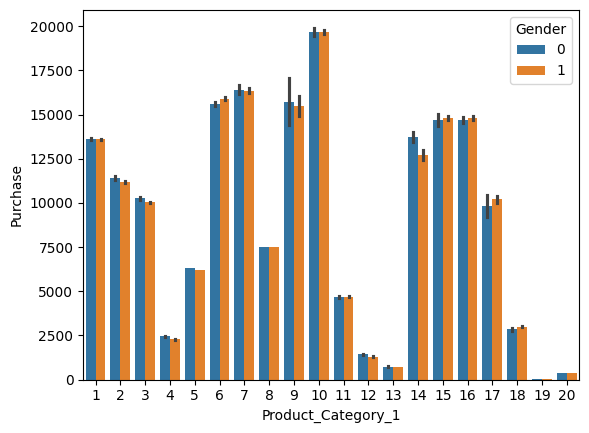

In [156]:
sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data=df)
plt.show()

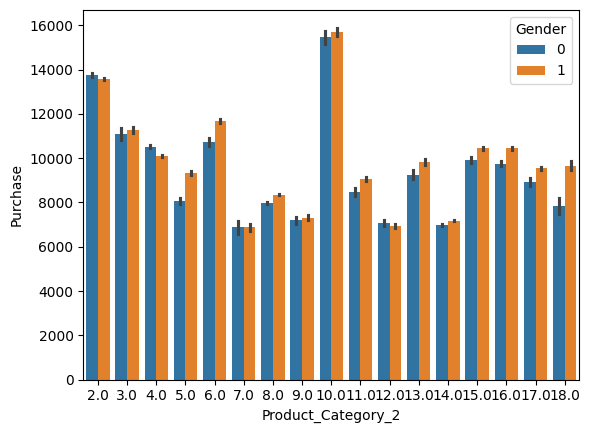

In [157]:
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=df)
plt.show()

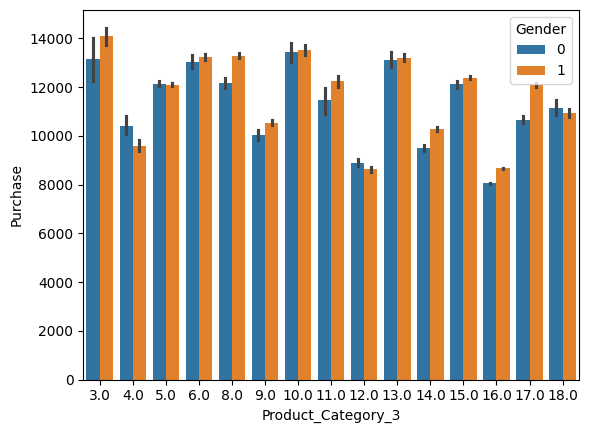

In [158]:
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data=df)
plt.show()

observation : prodct category is brougt is more then catgory_2 and then product_3


# Feature scalling

In [159]:
df.shape

(783667, 12)

In [161]:
df_test=df[df["Purchase"].isnull()]

In [162]:
df_train=df[~df["Purchase"].isnull() ]
df_train.shape

(550068, 12)

In [ ]:
x=df_train.drop("Purchase",axis=1,inplace=True)
y=df_train["Purchase"]

In [167]:
print(x.shape) 
print(y.shape)

(550068, 11)
(550068,)


In [174]:
#separte the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
500304,P00210042,1,3,16,0,0,8,14.0,16.0,0,0
16861,P00263542,1,3,1,2,1,16,8.0,16.0,1,0
113230,P00061142,1,2,7,1,0,8,16.0,16.0,0,0
434978,P00127242,1,3,0,1,0,1,16.0,16.0,0,0
385516,P00057542,0,4,3,3,1,3,4.0,5.0,0,1


In [178]:
#drop the string value columns
# Drop all string-type columns
x_train = x_train.select_dtypes(exclude=['object'])
x_test = x_test.select_dtypes(exclude=['object'])
x_test.head(1)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
84432,1,6,19,3,0,1,2.0,16.0,0,1


In [181]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train)
sc.fit_transform(x_test)


array([[ 0.57477292,  1.85405271,  1.67376786, ...,  0.36874617,
        -0.85312593,  1.49025657],
       [-1.73981753,  0.37382623,  0.44752121, ...,  0.36874617,
         1.1721599 , -0.67102539],
       [-1.73981753,  0.37382623, -1.23856793, ...,  0.36874617,
        -0.85312593, -0.67102539],
       ...,
       [ 0.57477292, -1.10640025,  1.21392536, ...,  0.36874617,
        -0.85312593,  1.49025657],
       [ 0.57477292, -1.10640025, -0.6254446 , ...,  0.00427372,
         1.1721599 , -0.67102539],
       [ 0.57477292, -1.10640025, -0.6254446 , ...,  0.36874617,
         1.1721599 , -0.67102539]], shape=(165021, 10))

# train the model